## logistic regression
- logistic regression은 분류 문제이고 sigmoid함수에 직선의 함수를 넣어서 결과를 판정한다
- 암 판정에서 양성, 음성을 판정할때는 0과 1만 있고 이것이 직선상으로 나타난다면 0.5를 기준으로 양/음성을 판별할 수 있다. 그러나 직선을 그릴때 0과 1 밖으로 
벗어나면 안되기 때문에 시그모이드 함수를 사용한다.

## sigmoid(시그모이드)
- 0과 1사이의 값만 있음

In [1]:
import numpy as np

z = np.arange(-10, 10, 0.01)
g = 1 / (1+np.exp(-z))

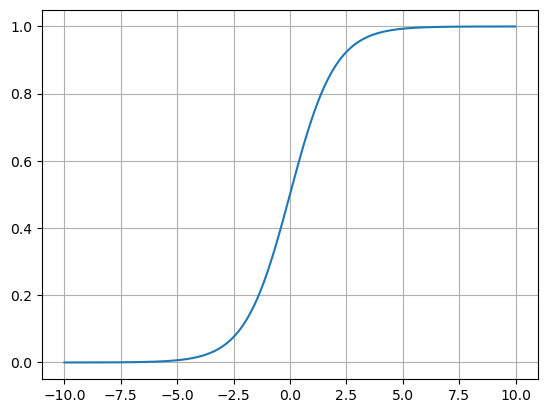

In [3]:
import matplotlib.pyplot as plt

plt.plot(z, g)
plt.grid()
plt.show();

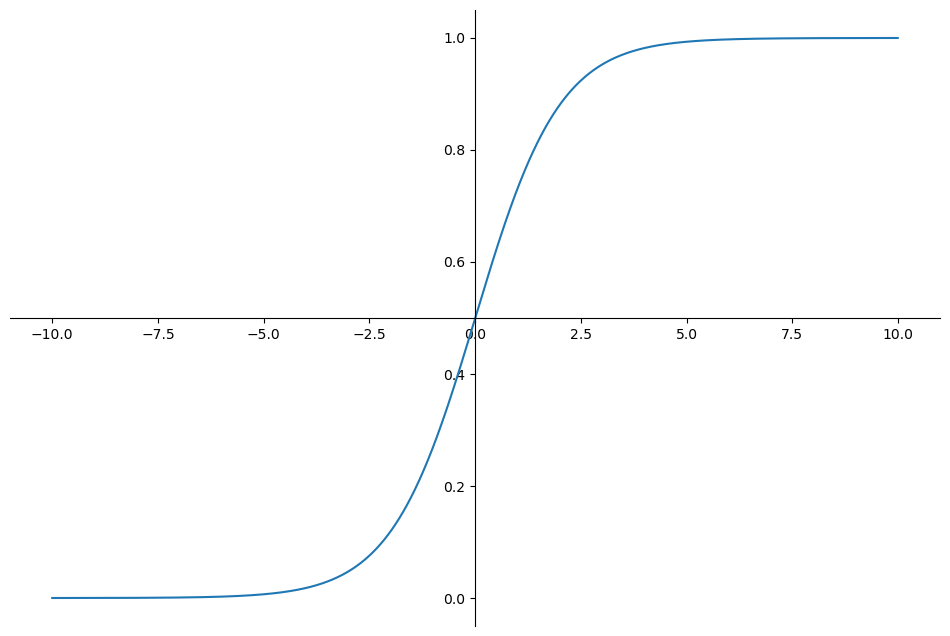

In [6]:
plt.figure(figsize=(12,8))
ax = plt.gca()  # gca는 설정값 변경할 수 있는 함수

ax.plot(z, g)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

plt.show();

## logistic regression의 cost function

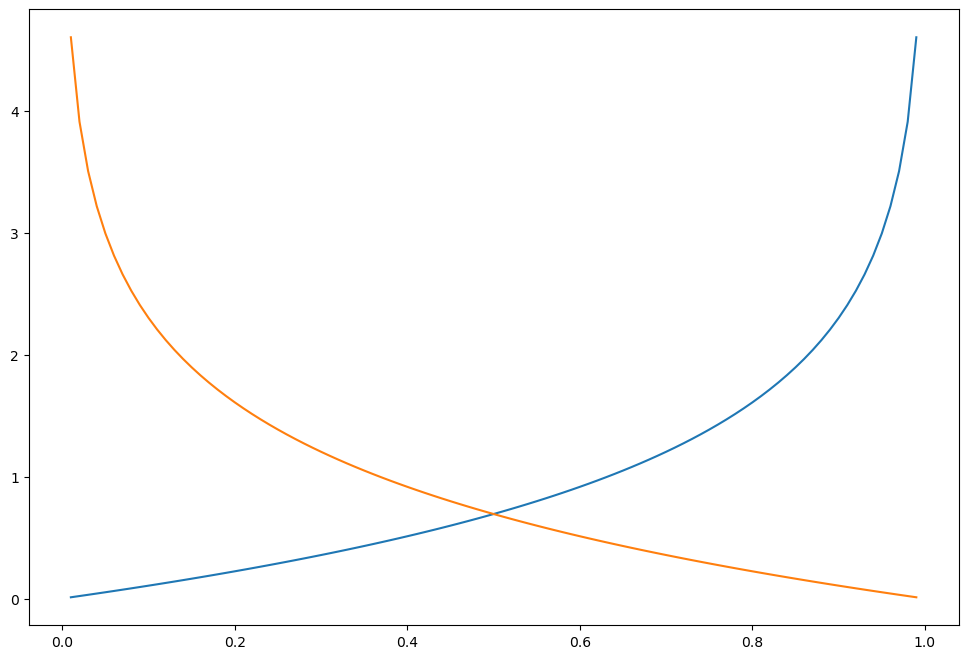

In [7]:
h = np.arange(0.01, 1, 0.01)

C0 = -np.log(1-h)
C1 = -np.log(h)

plt.figure(figsize=(12,8))
plt.plot(h, C0, label='y=0')
plt.plot(h, C1, label='y=1')

plt.show();

In [9]:
import pandas as pd

wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv'
wine = pd.read_csv(wine_url, index_col=0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [10]:
wine['taste'] = [1. if grade>5 else 0. for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver='liblinear', random_state=13)
lr.fit(X_train, y_train)

LogisticRegression(random_state=13, solver='liblinear')

In [13]:
y_pred_tr = lr.predict(X_train)
y_pred_test = lr.predict(X_test)


print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.7429286126611506
Test Acc :  0.7446153846153846


- pipeline

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

estimators = [
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(solver='liblinear', random_state=13))
]

pipe = Pipeline(estimators)

In [16]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(random_state=13, solver='liblinear'))])

In [17]:
y_pred_tr = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)


print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.7444679622859341
Test Acc :  0.7469230769230769


- decision tree와의 비교를 위한 작업

In [18]:
from sklearn.tree import DecisionTreeClassifier

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [20]:
models = {
    'logistic regression': pipe,
    'decision tree': wine_tree
}

- auc 그래프를 이용한 모델간 비교

In [22]:
for model_name, model in models.items():
    print(model_name)
    print(model)

logistic regression
Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(random_state=13, solver='liblinear'))])
decision tree
DecisionTreeClassifier(max_depth=2, random_state=13)


In [23]:
model.predict_proba(X_test)

array([[0.61602594, 0.38397406],
       [0.61602594, 0.38397406],
       [0.12197802, 0.87802198],
       ...,
       [0.12197802, 0.87802198],
       [0.61602594, 0.38397406],
       [0.12197802, 0.87802198]])

- 위의 그래프를 통해 logistic regression이 decision tree보다 성능이 좋다는 것을 알게 됨.(ㄱ뒤집어놓은 모양에 가까워질수록 성능이 좋은것임)

## PIMA 인디언 당뇨병 예측

In [26]:
import pandas as pd

PIMA_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/diabetes.csv"
PIMA = pd.read_csv(PIMA_url)
PIMA.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
# 다 float형으로 변환

PIMA = PIMA.astype('float')
PIMA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


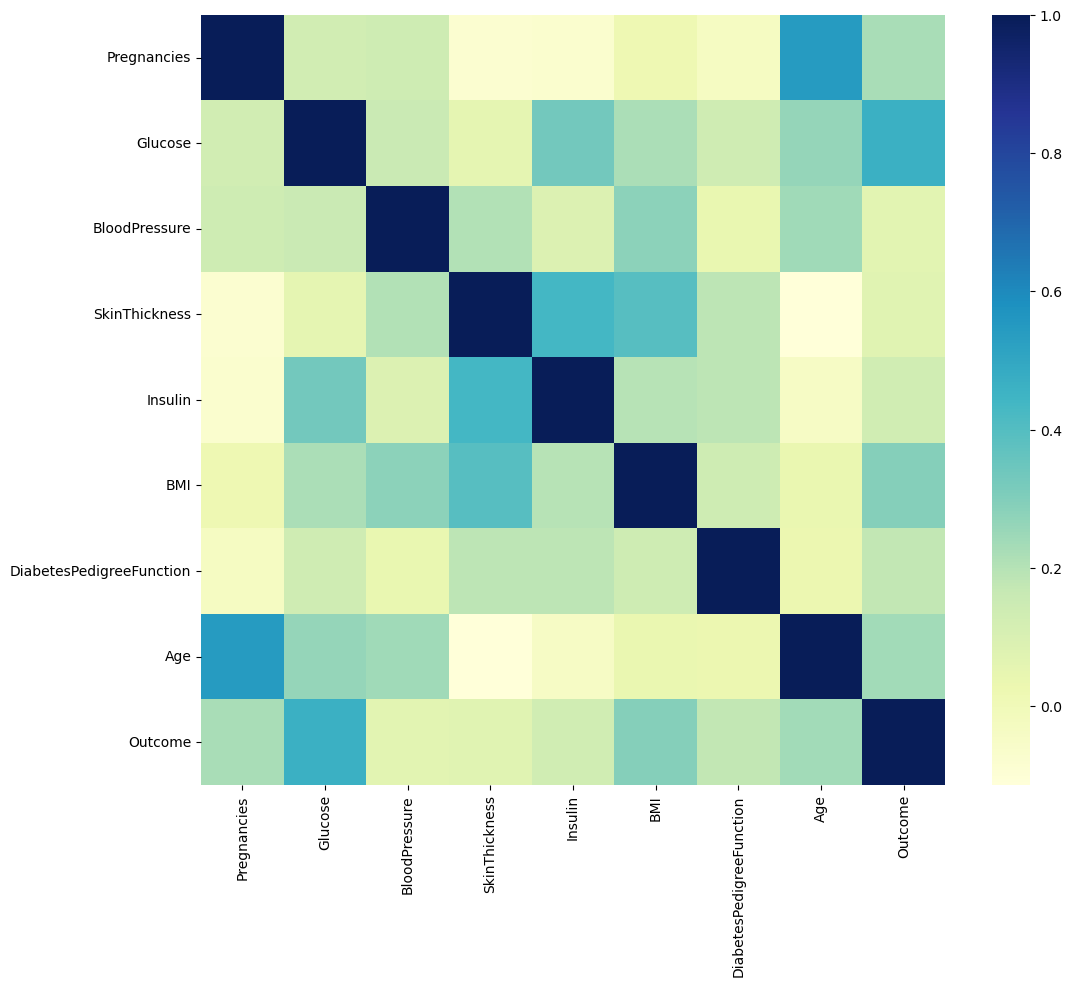

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(PIMA.corr(), cmap='YlGnBu')
plt.show();

In [30]:
(PIMA==0).astype(int).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [31]:
# 0이 나오면 안되는 값들에 0이 있음. 따라서 그런 컬럼은 평균값으로 대체해줌

zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
PIMA[zero_features] = PIMA[zero_features].replace(0, PIMA[zero_features].mean())

In [32]:
(PIMA==0).astype(int).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [33]:
X = PIMA.drop(['Outcome'], axis=1)
y = PIMA['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=13)

In [34]:
estimators = [
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(solver='liblinear', random_state=13))
]

pipe_lr = Pipeline(estimators)
pipe_lr.fit(X_train, y_train)
pred = pipe_lr.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_auc_score, f1_score

print('Accuracy : ', accuracy_score(y_test, pred))
print('Recall : ', recall_score(y_test, pred))
print('Precision : ', precision_score(y_test, pred))
print('AUC score : ', roc_auc_score(y_test, pred))
print('F1 score : ', f1_score(y_test, pred))

Accuracy :  0.7727272727272727
Recall :  0.6111111111111112
Precision :  0.7021276595744681
AUC score :  0.7355555555555556
F1 score :  0.6534653465346535


In [38]:
# 특성이 여러개인(데이터에서 정답 데이터 빼고 다른 컬럼이 여러개인 것) 다변수 방정식의 각 계수 값을 확인할 수 있다

coef = list(pipe_lr['clf'].coef_[0])
labels = list(X_train.columns)

In [39]:
features = pd.DataFrame({'Features':labels, 'importance':coef})
features

,Features,importance
0,Pregnancies,0.354266
1,Glucose,1.201424
2,BloodPressure,-0.158401
3,SkinThickness,0.033947
4,Insulin,-0.162865
5,BMI,0.620405
6,DiabetesPedigreeFunction,0.366694
7,Age,0.171960


In [40]:
features.sort_values(by=['importance'], ascending=True, inplace=True)
features

,Features,importance
4,Insulin,-0.162865
2,BloodPressure,-0.158401
3,SkinThickness,0.033947
7,Age,0.171960
0,Pregnancies,0.354266
6,DiabetesPedigreeFunction,0.366694
5,BMI,0.620405
1,Glucose,1.201424


In [41]:
features['positive'] = features['importance']>0

In [42]:
features

,Features,importance,positive
4,Insulin,-0.162865,False
2,BloodPressure,-0.158401,False
3,SkinThickness,0.033947,True
7,Age,0.171960,True
0,Pregnancies,0.354266,True
6,DiabetesPedigreeFunction,0.366694,True
5,BMI,0.620405,True
1,Glucose,1.201424,True


In [43]:
features.set_index('Features', inplace=True)
features

,importance,positive
Features,,
Insulin,-0.162865,False
BloodPressure,-0.158401,False
SkinThickness,0.033947,True
Age,0.171960,True
Pregnancies,0.354266,True
DiabetesPedigreeFunction,0.366694,True
BMI,0.620405,True
Glucose,1.201424,True


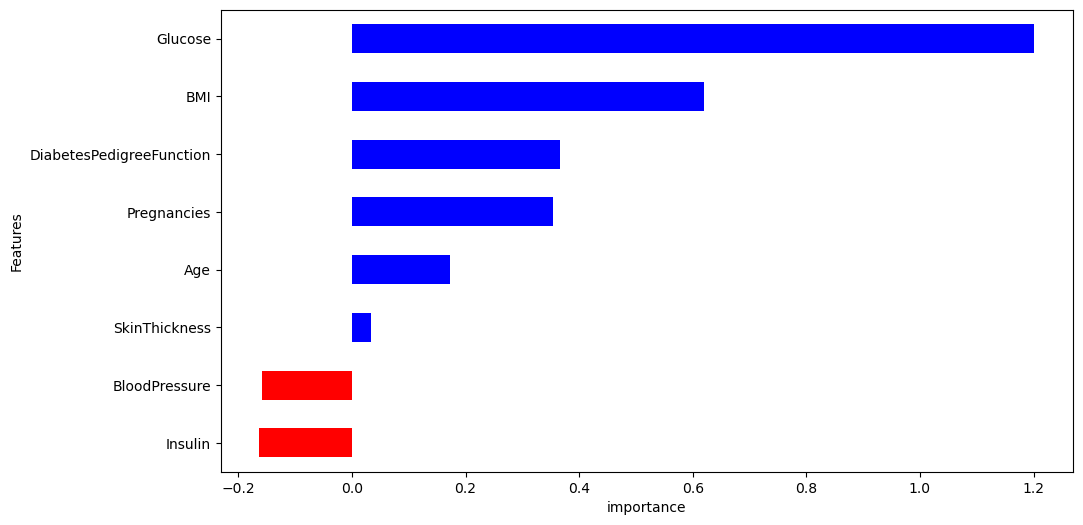

In [44]:
features['importance'].plot(kind='barh', figsize=(11,6), color=features['positive'].map({True:'blue', False:'red'}))
plt.xlabel('importance')
plt.show();